Kun Peng

Research Question:  
Does a higher percentage of ADJ words correlate with higher quality essays.  
  
Hypothesis:  
Essays that have a higher percentage of ADJ words will have higher quality (higher holistic scores).  


In [ ]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
drive.mount('/content/drive')

# change directory
import os
os.chdir("/content/drive/MyDrive/nlp_hw8") #change directory

#list files in that folder
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['writing_data_w_meta_data.csv']

In [ ]:
#import pandas
import pandas as pd

#read in the .csv file
writing_data = pd.read_csv('writing_data_w_meta_data.csv', encoding = "utf8") #note, utf8 works with this dataframe.

In [ ]:
# safe divide function to stop zero counts from causing problems. This is zero counts for number of words
def safe_divide(a, b): #function calls two arguments. Here it will be a POS count and number of words
    if b != 0: #
        return a/b
    else:
        return 0

In [ ]:
# import spaCy and nlp the texts
import spacy
nlp = spacy.load("en_core_web_sm")
writing_data_docs = list(nlp.pipe(writing_data.text)) #spacy the texts

# empty lists to hold final results
nw_final = [] # word count
adj_final = []

#loop for each document in spacy doc
for doc in writing_data_docs:
    nw = 0 #starting count for number of words
    adj = 0
    for token in doc: #for token in each doc
        print(token.text, token.pos_) #sanity check as needed
        if token.is_punct or token.is_space:
          continue #this will skip punctuation and spaces (i.e., continue to the next token)
        nw += 1
        ## A different way to count number of words
        # if not token.is_punct and not token.pos_ == "SPACE": #if the token is not punctuation, it must be a word. There are also weird space counts at the paragraph level...
        #     #print(token.text, token.pos_, token.dep_) #test that hypothesis
        #     nw += 1 #add 1 to nw count for each token that is not a punct
        if token.pos_ == "ADJ": #if the token.pos_ is ADJ
            #print("this is an adjective")
            adj += 1 #plus 1 to adjective count

    #print(nw) #this will print by text
    nw_final.append(nw) #append number of words by text to list above (creating a list of ints)
    adj_final.append(safe_divide(adj, nw))

print(nw_final)
print(adj_final)

In [ ]:
#adding these results to the dataframe as new columns
writing_data['NW'] = nw_final
writing_data['ADJ'] = adj_final
writing_data.head()


,TextID,text,Participant,Semester,Time,Prompt,EffectiveLead,ClearPurpose,ClearPlan,TopicSentences,ParagraphTransitions,Organization,Unity,Perspective,Conviction,GrammarMechanics,Holistic,NW,ADJ
0,fall_103_pre,What makes a hero or a celebrity? Are both equ...,fall_103,fall,pre,2,4.0,5.0,5.5,5.5,4.5,5.0,4.5,4.5,4.5,5.0,5.0,298,0.083893
1,fall_100_pre,"In our society, celebrities are glamorized by ...",fall_100,fall,pre,2,5.0,5.5,5.0,5.5,3.0,5.0,4.5,4.0,4.0,5.5,5.0,336,0.065476
2,fall_107_post,Originality is purely a measure of what one kn...,fall_107,fall,post,1,5.0,3.5,2.0,4.0,2.0,4.0,3.5,2.0,2.0,5.0,2.5,358,0.108939
3,fall_102_pre,Both heroes and celebrities have the right to ...,fall_102,fall,pre,2,2.5,2.0,3.5,4.0,3.5,3.0,2.5,1.5,2.0,3.5,2.0,229,0.052402
4,fall_101_pre,What makes a hero? Is it someone whose looks a...,fall_101,fall,pre,2,4.0,5.5,5.0,5.5,4.0,5.5,5.0,5.0,5.5,5.0,5.5,400,0.062500


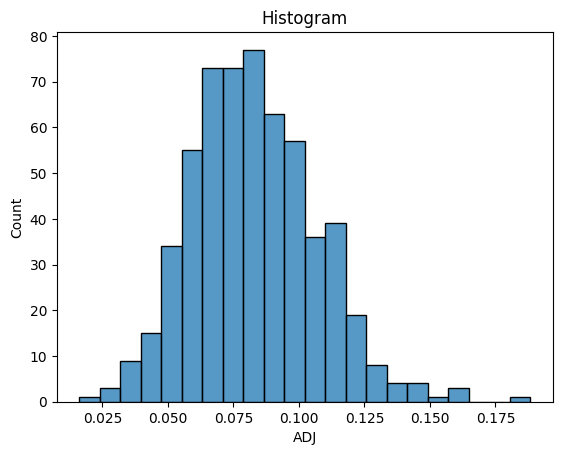

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create histogram to look at distribution of ADJ word percentages in the essays
sns.histplot(data=writing_data, x='ADJ')
plt.title('Histogram')
plt.show()

The Correlation Between ADJ and Holistic:
               ADJ  Holistic
ADJ       1.000000  0.035403
Holistic  0.035403  1.000000
P-value: 0.39680
Correlation is NOT statistically significant (p ≥ 0.05)


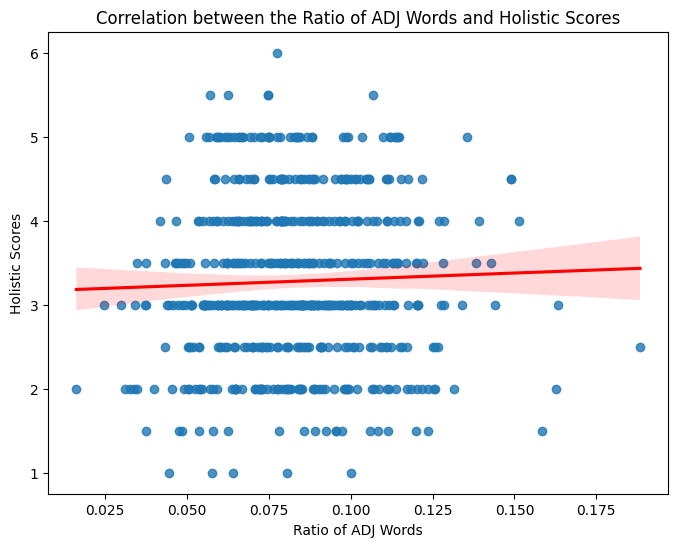

In [ ]:
# create correlation matrix between ADJ and Holistic
correlation_matrix = writing_data[['ADJ', 'Holistic']].corr()
print("The Correlation Between ADJ and Holistic:")
print(correlation_matrix)

# statistical significance
from scipy.stats import pearsonr
_, p_value = pearsonr(writing_data['ADJ'], writing_data['Holistic'])
print(f"P-value: {p_value:.5f}")
print("Correlation is NOT statistically significant (p ≥ 0.05)")

# plot a scatter plot and overlay a regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=writing_data, x='ADJ', y='Holistic', scatter=True, line_kws={'color': 'red'})
plt.title('Correlation between the Percent of ADJ Words and Holistic Scores')
plt.xlabel('Percent of ADJ Words')
plt.ylabel('Holistic Scores')
plt.show()

##Discussion:
# Our research question was if a higher percentage of ADJ words in the essays correlated with higher essay quality
# as represented by the Holistic score. We wanted to compare these two values because adjectives add more descriptive detail to writings,
# and that is generally intuitively associated with better essays.
# The visualization showed a nearly flat trend line, and the correlation is also not statistically significant.
# So contrary to our hypothesis, we were not able to find the percentage of ADJ words used to have any significant
# correlation with essay quality in this case.

